In [1]:
import pandas as pd
from pathlib import Path
from collections import Counter
import matplotlib.pyplot as plt
from transformers import AutoTokenizer

In [2]:
from utils import generate_combined_df

In [3]:
train_df = generate_combined_df(subset="train")
dev_df = generate_combined_df(subset="dev")
fit_df = pd.concat([train_df, dev_df]).drop_duplicates()

In [4]:
tokenizer = AutoTokenizer.from_pretrained('roberta-base')

## Arguments training data

In [5]:
fit_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24093 entries, 0 to 3457
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   arg_id        24093 non-null  object
 1   argument      24093 non-null  object
 2   key_point_id  24093 non-null  object
 3   key_point     24093 non-null  object
 4   topic         24093 non-null  object
 5   stance        24093 non-null  int64 
 6   label         24093 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 1.5+ MB


In [6]:
f"The number of topics: {len(set(fit_df.topic))}"

'The number of topics: 28'

In [7]:
f"The number of arguments: {len(set(fit_df.argument))}"

'The number of arguments: 6515'

In [8]:
f"The number of keypoints: {len(set(fit_df.key_point_id))}"

'The number of keypoints: 243'

In [9]:
print(f"Have duplicated argument: {len(set(fit_df.argument)) != len(fit_df)}")
print(f"Have duplicated keypoint: {len(set(fit_df.key_point)) != len(fit_df)}")
print(f"Have duplicated topic: {len(set(fit_df.topic)) != len(fit_df)}")


Have duplicated argument: True
Have duplicated keypoint: True
Have duplicated topic: True


In [10]:
counter = Counter(fit_df['label'])
counter

Counter({0: 19095, 1: 4998})

In [11]:
pos_ratios = []
for topic in set(fit_df.topic):
    _stance = fit_df[fit_df.topic == topic].stance
    _counter = Counter(_stance)
    _counter_sorted = sorted(_counter.items())
    pos_ratios.append(_counter_sorted[1][1]/_counter_sorted[0][1])

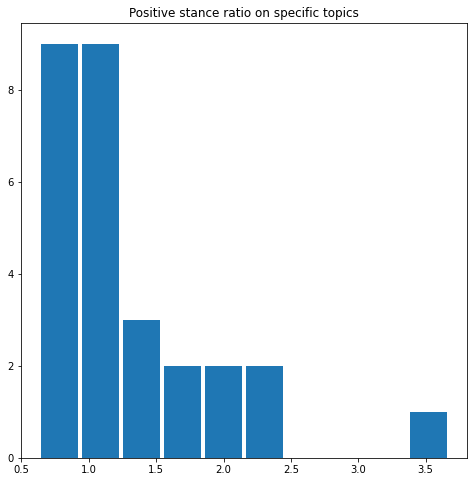

In [12]:
fig = plt.figure(figsize=(8,8))
plt.hist(pos_ratios, rwidth=0.9)
plt.title("Positive stance ratio on specific topics")
plt.show()

## Length

In [13]:
argu_length = []
for argu in set(fit_df.argument):
    _len = len(argu.split(' '))
    argu_length.append(_len)

In [14]:
argu_tk_length = []
for argu in set(fit_df.argument):
    _len = len(tokenizer.tokenize(argu))
    argu_tk_length.append(_len)

In [15]:
topic_length = []
for topic in set(fit_df.topic):
    _len = len(topic.split(' '))
    topic_length.append(_len)

In [16]:
topic_tk_length = []
for tp in set(fit_df.topic):
    _len = len(tokenizer.tokenize(tp))
    topic_tk_length.append(_len)

In [17]:
kp_length = []
for kp in set(fit_df.key_point):
    _len = len(kp.split(' '))
    kp_length.append(_len)

In [18]:
kp_tk_length = []
for kp in set(fit_df.key_point):
    _len = len(tokenizer.tokenize(kp))
    kp_tk_length.append(_len)

In [19]:
pair_tk_len = [sum(x) for x in zip(argu_tk_length, topic_tk_length)]
pair_len = [sum(x) for x in zip(argu_length, topic_length)]


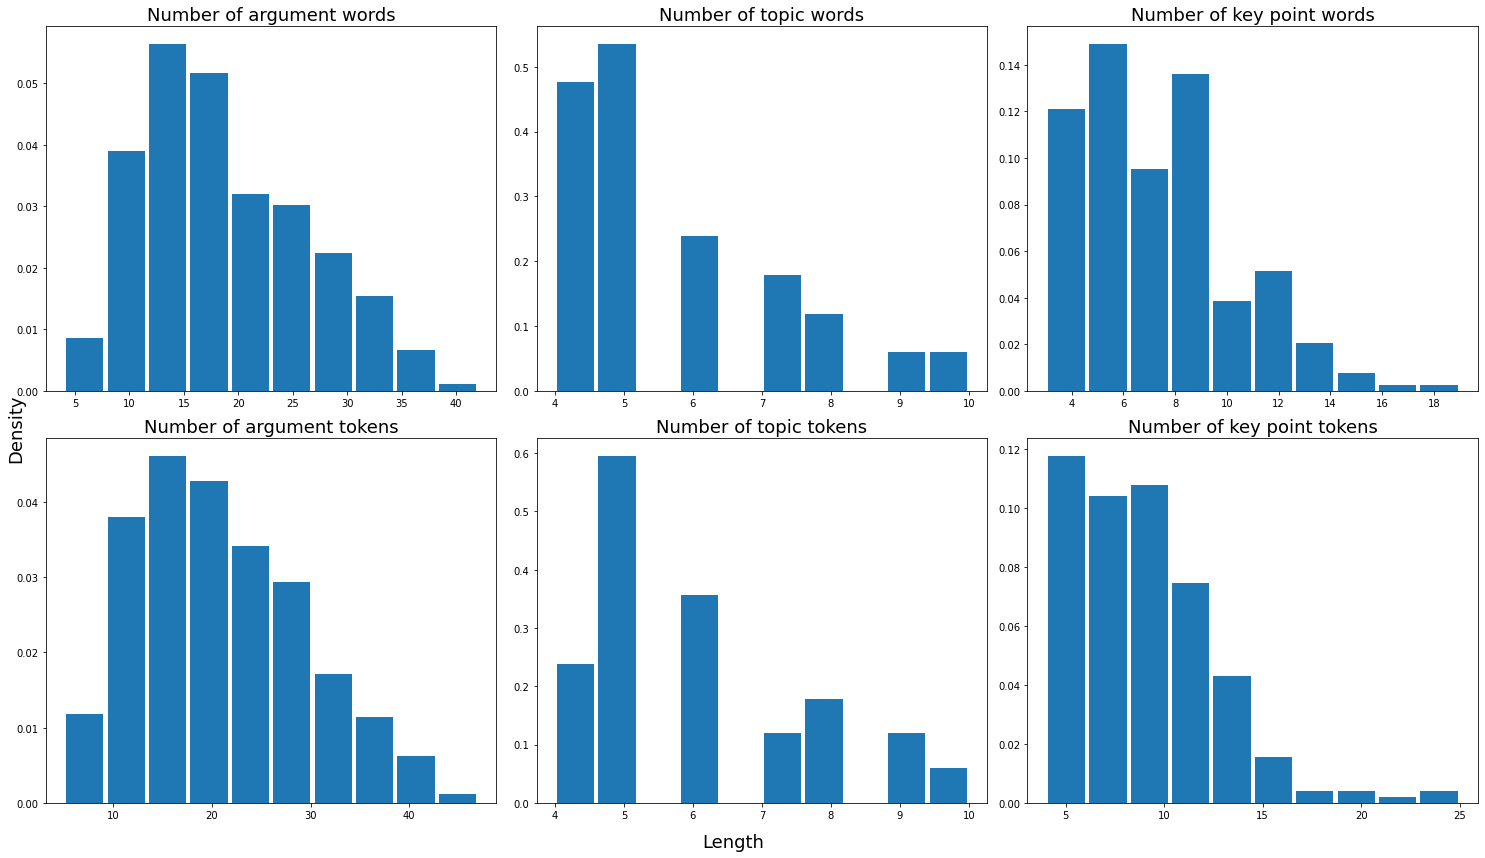

In [21]:
fig, axs = plt.subplots(2, 3, figsize=(21,12))
axs.ravel()

axs[0,0].hist(argu_length, rwidth=0.9, density=True)
axs[0,0].set_title("Number of argument words", fontsize=18)

axs[0, 1].hist(topic_length, rwidth=0.9, density=True)
axs[0, 1].set_title("Number of topic words", fontsize=18)

axs[0, 2].hist(kp_length, rwidth=0.9, density=True)
axs[0, 2].set_title("Number of key point words", fontsize=18)

axs[1, 0].hist(argu_tk_length, rwidth=0.9, density=True)
axs[1, 0].set_title("Number of argument tokens", fontsize=18)

axs[1, 1].hist(topic_tk_length, rwidth=0.9, density=True)
axs[1, 1].set_title("Number of topic tokens", fontsize=18)

axs[1, 2].hist(kp_tk_length, rwidth=0.9, density=True)
axs[1, 2].set_title("Number of key point tokens", fontsize=18)

# axs[2, 0].hist(pair_len, rwidth=0.9)
# axs[2, 0].set_title("Number of pair words", fontsize=18)

# axs[2, 1].hist(pair_tk_len, rwidth=0.9)
# axs[2, 1].set_title("Number of pair tokens", fontsize=18)

fig.supxlabel("Length", fontsize=18)
fig.supylabel("Density", fontsize=18)

plt.tight_layout()

plt.show()

In [56]:
max(pair_tk_len)

41

## Label distribution over different columns

In [18]:
fit_df[['arg_id', 'label']].groupby('arg_id').mean().std()

label    0.204462
dtype: float64

In [17]:
fit_df[['key_point_id', 'label']].groupby('key_point_id').mean().std()

label    0.208997
dtype: float64

In [16]:
fit_df[['topic', 'label']].groupby('topic').mean().std()

label    0.093498
dtype: float64